# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [14]:
import main  

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

In [2]:
f_1 = lambda x: np.sign(x)*x+x**2
f_2 = lambda x: np.sign(x)*x**2
f_3 = lambda x: np.abs(sin(5*x))**3
fa1 = lambda x: 1/(1+x**2)
fa25 = lambda x: 1/(1+25*x**2)
fa100 = lambda x: 1/(1+100*x*x**2)
f4 = lambda x: np.sign(x)

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

In [3]:
#from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
#f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
#x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
#interpolation_nodes_number = 1e1
#xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
#yimp = barycentric_interpolate(xch,f(xch),x)

#plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
#plt.plot(x,yimp,'r',label = 'interpolacja')
#plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
#plt.xlabel("x")
#plt.ylabel("y")
#plt.legend(loc = 0)
#plt.grid()
#plt.show()

Porównanie funkcji bibliotecznej i funkcji własnej


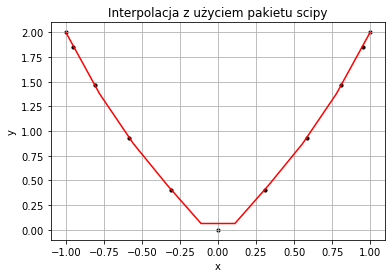

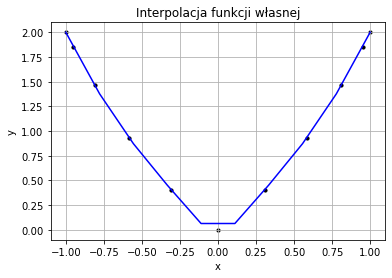

In [4]:
from scipy.interpolate import barycentric_interpolate
print("Porównanie funkcji bibliotecznej i funkcji własnej")
n=10
x=np.linspace(-1,1,n)
xi=main.chebyshev_nodes(n)
yi= np.array([main.f1(j) for j in xi])
wi=main.bar_czeb_weights(n)
#interpolacja z użyciem pakietu scipy
scipy_int=barycentric_interpolate(xi,yi,x)
#interpolacja z użyciem funkcji własnej
func_int = main.barycentric_inte(xi,yi,wi,x)
plt.figure()
plt.plot(x, scipy_int, "r",label='interpolacja')
plt.scatter(xi,yi,s=10,c='k',label='wezly')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja z użyciem pakietu scipy")
plt.grid()
plt.show()
plt.figure()
plt.scatter(xi,yi,s=10,c='k',label='wezly')
plt.plot(x,func_int,'b',label='interpolacja')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Interpolacja funkcji własnej")
plt.show()


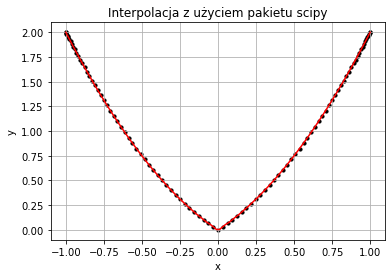

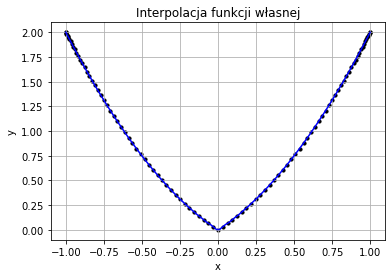

In [5]:
n=100
x=np.linspace(-1,1,n)
xi=main.chebyshev_nodes(n)
yi= np.array([main.f1(j) for j in xi])
wi=main.bar_czeb_weights(n)
#interpolacja z użyciem pakietu scipy
scipy_int=barycentric_interpolate(xi,yi,x)
#interpolacja z użyciem funkcji własnej
func_int = main.barycentric_inte(xi,yi,wi,x)
plt.figure()

plt.plot(x, scipy_int, "r",label='interpolacja')
plt.scatter(xi,yi,s=10,c='k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja z użyciem pakietu scipy")
plt.grid()
plt.show()

plt.figure()

plt.scatter(xi,yi,s=10,c='k')
plt.plot(x,func_int,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Interpolacja funkcji własnej")
plt.show()

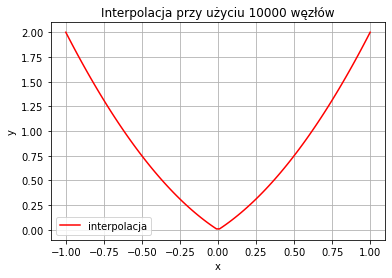

In [6]:
#interpolacja rzędu 1000
wi = main.bar_czeb_weights(1000)
xi = main.chebyshev_nodes(1000)
yi = main.f1(xi)


yimp = main.barycentric_inte(xi, yi,wi, x)
plt.plot(x, yimp, "r",label='interpolacja')
plt.scatter(xi, yi, s=0.0000000001, c="k") 
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja przy użyciu 10000 węzłów")
plt.grid()
plt.show()

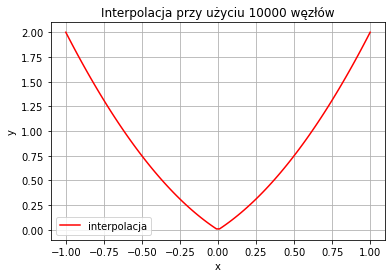

In [7]:
#interpolacja rzędu 10000
wi = main.bar_czeb_weights(10000)
xi = main.chebyshev_nodes(10000)
yi = f_1(xi)


yimp = main.barycentric_inte(xi, yi,wi, x)
plt.plot(x, yimp, "r",label='interpolacja')
plt.scatter(xi, yi, s=0.0000000001, c="k") 
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja przy użyciu 10000 węzłów")
plt.grid()
plt.show()

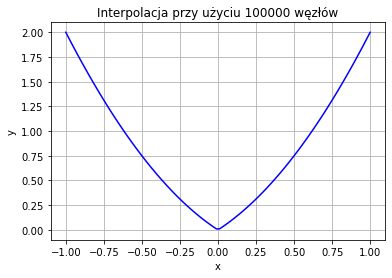

In [8]:
#interpolacja rzędu 100000
wi = main.bar_czeb_weights(100000)
xi = main.chebyshev_nodes(100000)
yi = f_1(xi)


yimp = main.barycentric_inte(xi, yi,wi, x)
plt.plot(x, yimp, "b",label="interpolacja")
plt.scatter(xi, yi, s=0.000000000001, c="k") 

plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja przy użyciu 100000 węzłów")
plt.grid()
plt.show()

**Komentarz**
Podsumowując możemy stwierdzić, że dla większej ilości węzłów są one dla nas niewidoczne nawet z zastosowaniem funkcji plt.scatter.


***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

In [8]:
from scipy.interpolate import barycentric_interpolate
v_n =[10,100,1000,10000,100000]
x=np.linspace(-1,1,1000)
for i in v_n:
    xi = main.chebyshev_nodes(i)
    yi = np.array([main.f1(j) for j in xi])
    wi = main.bar_czeb_weights(i)
    f_int = main.barycentric_inte(xi,yi,wi,x)
    #scipy_int = barycentric_interpolate(xi,yi,x)
    f_y = np.array([main.f1(j)for j in x])
    norm = main.L_inf(f_int,f_y)
    print("Jakość interpolacji rzędu {a}:{b}".format(a=i,b=main.L_inf(f_int,f_y)))

Jakość interpolacji rzędu 10:0.05921962436810316
Jakość interpolacji rzędu 100:0.0059654189244170465
Jakość interpolacji rzędu 1000:0.0005739642836657274
Jakość interpolacji rzędu 10000:8.303505128152717e-06
Jakość interpolacji rzędu 100000:6.550513126412152e-08


***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

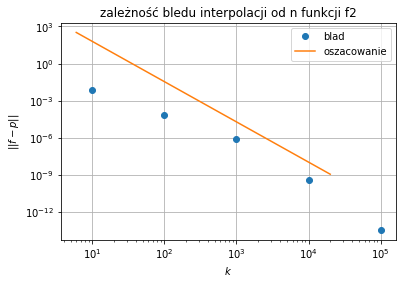

In [12]:
v_n =[10,100,1000,10000,100000]
x=np.linspace(-1,1,1000)
f2_y =np.array([main.f2(j) for j in x])
f3_y = np.array([main.f3(j) for j in x])
f2_norm = []
f3_norm = []
for i in v_n:
    xi = main.chebyshev_nodes(i)
    f2_yi = np.array([main.f2(j) for j in xi])
    f3_yi = np.array([main.f3(j)for j in xi])
    
    wi = main.bar_czeb_weights(i)
    f2_int=main.barycentric_inte(xi,f2_yi,wi,x)
    f3_int = main.barycentric_inte(xi,f3_yi,wi,x)
    f2_norm.append(main.L_inf(f2_int,f2_y))
    f3_norm.append(main.L_inf(f3_int,f3_y))
    
plt.figure()
ax1=plt.subplot()
ax1.loglog(v_n,f2_norm,'o',label='blad')
ax1.grid()
V=2.102e4
bound = lambda n:4*V/3/np.pi/(n-3)**3
ax1.loglog([6,2e4],[bound(6),bound(2e4)],label='oszacowanie')
ax1.legend()
ax1.set_xlabel('$k$')
ax1.set_ylabel('$||f-p||$')
ax1.set_title('zależność bledu interpolacji od n funkcji f2')
plt.show()

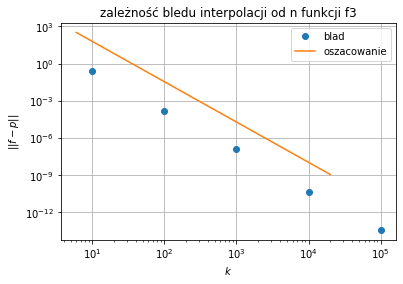

In [13]:
plt.figure()
ax1=plt.subplot()
ax1.loglog(v_n,f3_norm,'o',label='blad')
ax1.grid()
V=2.102e4
bound = lambda n:4*V/3/np.pi/(n-3)**3
ax1.loglog([6,2e4],[bound(6),bound(2e4)],label='oszacowanie')
ax1.legend()
ax1.set_xlabel('$k$')
ax1.set_ylabel('$||f-p||$')
ax1.set_title('zależność bledu interpolacji od n funkcji f3')
plt.show()

***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

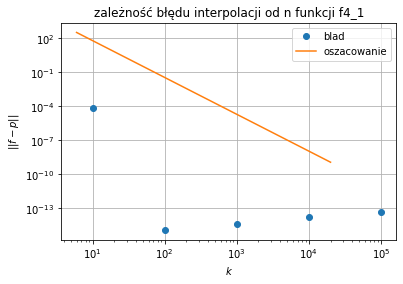

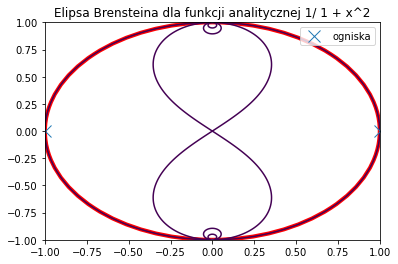

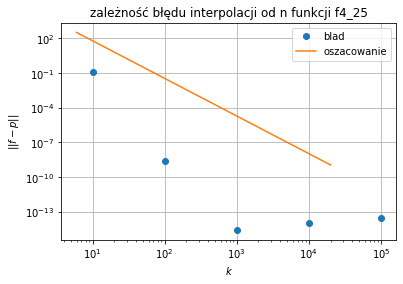

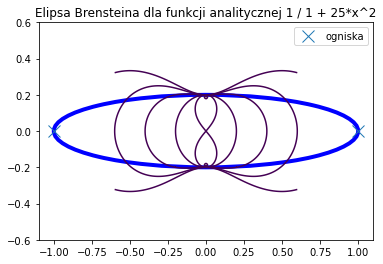

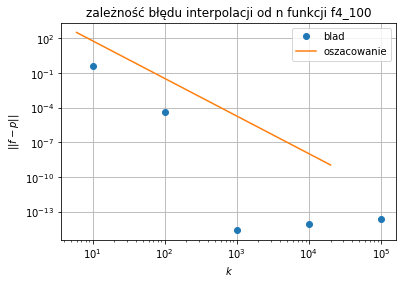

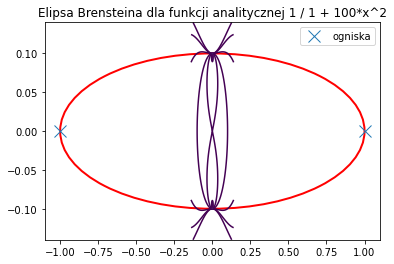

In [19]:
v_n =[10, 100, 1000, 10000, 100000]
x = np.linspace(-1, 1, 1000)
f4_1_y = np.array([m.f4_1(j) for j in x])
f4_25_y = np.array([m.f4_25(j) for j in x])
f4_100_y = np.array([m.f4_100(j) for j in x])
f4_1_norm = []
f4_25_norm = []
f4_100_norm = []
for i in v_n:
    xi = main.chebyshev_nodes(i)
    f4_1_yi = np.array([m.f4_1(j) for j in xi])
    f4_25_yi = np.array([m.f4_25(j) for j in xi])
    f4_100_yi = np.array([m.f4_100(j) for j in xi])
    wi = main.bar_czeb_weights(i)
    f4_1_int = main.barycentric_inte(xi, f4_1_yi, wi, x)
    f4_25_int = main.barycentric_inte(xi, f4_25_yi, wi, x)
    f4_100_int = main.barycentric_inte(xi, f4_100_yi, wi, x)
    f4_1_norm.append(main.L_inf(f4_1_int, f4_1_y))
    f4_25_norm.append(main.L_inf(f4_25_int, f4_25_y))
    f4_100_norm.append(main.L_inf(f4_100_int, f4_100_y))

plt.figure()
ax1 = plt.subplot()
ax1.semilogy(v_n, f4_1_norm, 'o', label="blad")
ax1.grid()
V=2.102e4
bound = lambda n:4*V/3/np.pi/(n-3)**3
ax1.loglog([6,2e4],[bound(6),bound(2e4)],label='oszacowanie')
ax1.legend()
ax1.set_xlabel('$k$')
ax1.set_ylabel('$||f-p||$')
ax1.set_title("zależność błędu interpolacji od n funkcji f4_1")
plt.show()


xx = np.linspace(-1, 1, 1000)
yy = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(xx, yy)
Z = main.f4_1(X + 1j * Y)
elipsa = plt.figure()
ax = plt.gca()
ax.contour(X, Y, Z, [0.05, 0.1, 0.2, 0.5, 1, 5, 10, 100 ,1000])

b=1
a=1
ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, 
                        edgecolor='r', fc='None', lw=4)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x',label='ogniska',markersize=12)
plt.title("Elipsa Brensteina dla funkcji analitycznej 1/ 1 + x^2")
ax.legend()
plt.show()


plt.figure()
ax1 = plt.subplot()
ax1.semilogy(v_n, f4_25_norm, 'o', label="blad")
ax1.grid()
V=2.102e4
bound = lambda n:4*V/3/np.pi/(n-3)**3
ax1.loglog([6,2e4],[bound(6),bound(2e4)],label='oszacowanie')
ax1.legend()
ax1.set_xlabel('$k$')
ax1.set_ylabel('$||f-p||$')
ax1.set_title("zależność błędu interpolacji od n funkcji f4_25")
plt.show()

xx = np.linspace(-0.6, 0.6, 1000)
yy = np.linspace(-0.6, 0.6, 1000)
X, Y = np.meshgrid(xx, yy)
Z = 1 / (1 + 25 * (X + 1j * Y)**2)
elipsa = plt.figure()
ax = plt.gca()
ax.contour(X, Y, Z, [0.05, 0.1, 0.2, 0.5, 1, 5, 10, 100 ,1000])

b=0.2
a=1
ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, 
                        edgecolor='b', fc='None', lw=4)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x',label='ogniska',markersize=12)
plt.title("Elipsa Brensteina dla funkcji analitycznej 1 / 1 + 25*x^2")
ax.legend()
plt.show()

plt.figure()
ax1 = plt.subplot()
ax1.loglog(v_n, f4_100_norm, 'o', label="blad")
ax1.grid()
V=2.102e4
bound = lambda n:4*V/3/np.pi/(n-3)**3
ax1.semilogy([6,2e4],[bound(6),bound(2e4)],label='oszacowanie')
ax1.legend()
ax1.set_xlabel('$k$')
ax1.set_ylabel('$||f-p||$')
ax1.set_title("zależność błędu interpolacji od n funkcji f4_100")
plt.show()

xx = np.linspace(-0.14, 0.14, 1000)
yy = np.linspace(-0.14, 0.14, 1000)
X, Y = np.meshgrid(xx, yy)
Z = 1 / (1 + 100 * (X + 1j * Y)**2)
elipsa = plt.figure()
ax = plt.gca()
ax.contour(X, Y, Z, [0.05, 0.1, 0.2, 0.5, 1, 5, 10, 100 ,1000])

b=0.1
a=1
ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x',label='ogniska',markersize=12)
plt.title("Elipsa Brensteina dla funkcji analitycznej 1 / 1 + 100*x^2")
ax.legend()
plt.show()





***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

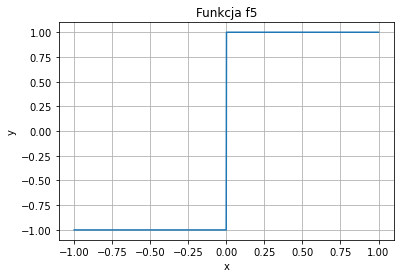

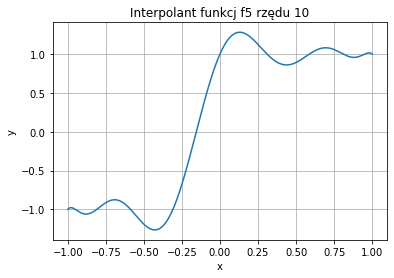

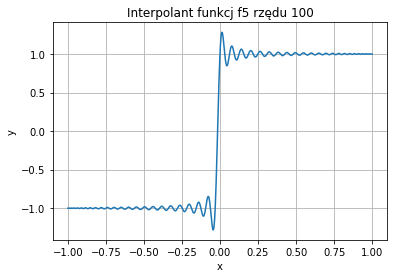

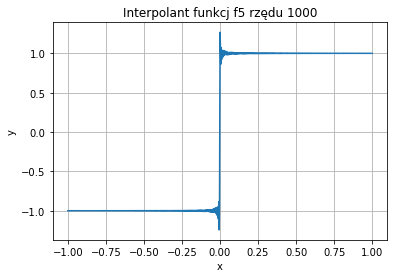

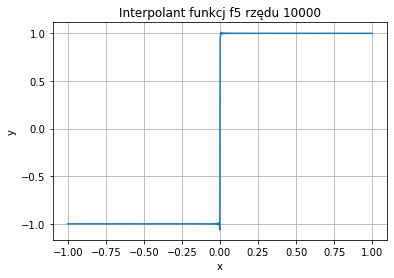

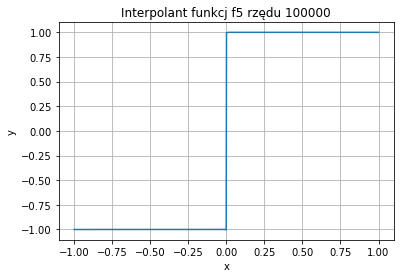

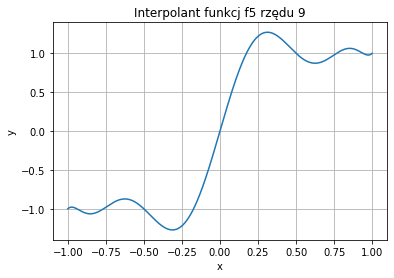

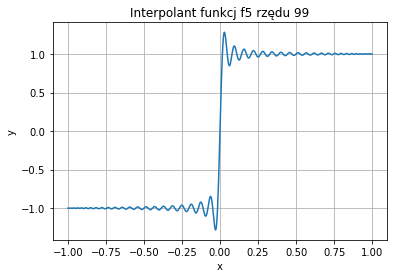

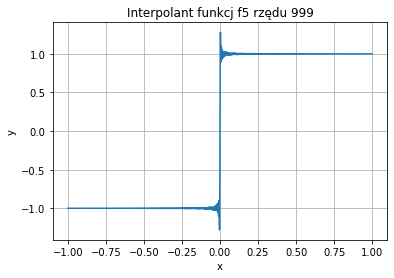

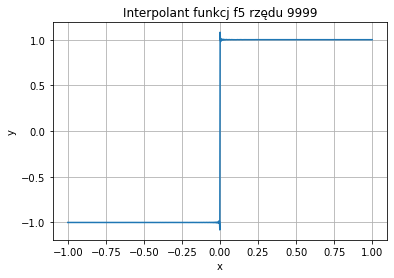

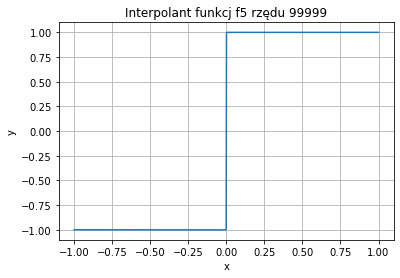

Minimalny błąd dla n nieparzystych wynosi: 0.009070706372782844
Minimalny błąd dla n parzystych wynosi: 0.004237676564706083


In [27]:
n1 = [10, 100, 1000, 10000, 100000]
n2 = [9, 99, 999, 9999, 99999]
x = np.linspace(-1, 1, 1000)
y = np.array([main.f5(j) for j in x])
n1_norm = []
n2_norm = []
plt.figure()
ax = plt.subplot()
ax.plot(x, y)
ax.set(title="Funkcja f5", xlabel="x", ylabel="y")
ax.grid()
plt.show()
for i in n1:
    xi = main.chebyshev_nodes(i)
    yi = np.array([main.f5(j) for j in xi])
    wi = main.bar_czeb_weights(i)
    f_int = main.barycentric_inte(xi, yi, wi, x)
    n1_norm.append(main.L_inf(f_int, y))
    plt.figure()
    ax = plt.subplot()
    ax.plot(x, f_int)
    ax.set(title="Interpolant funkcj f5 rzędu {a}".format(a=i), xlabel="x", ylabel="y")
    ax.grid()
    plt.show()
for i in n2:
    xi = main.chebyshev_nodes(i)
    yi = np.array([main.f5(j) for j in xi])
    wi = main.bar_czeb_weights(i)
    f_int = main.barycentric_inte(xi, yi, wi, x)
    n2_norm.append(main.L_inf(f_int, y))
    plt.figure()
    ax = plt.subplot()
    ax.plot(x, f_int)
    ax.set(title="Interpolant funkcj f5 rzędu {a}".format(a=i), xlabel="x", ylabel="y")
    ax.grid()
    plt.show()   

print("Minimalny błąd dla n nieparzystych wynosi: {a}".format(a=min(n2_norm)))
print("Minimalny błąd dla n parzystych wynosi: {a}".format(a=min(n1_norm)))

**Komentarz**
Minimalny błąd dla nieparzystej lcziby n jest ponad 2 razy większy

**Wnioski:**  
-Zapoznanie się z terminem interpolacja oraz sprawdzanie jej działania za pomocą funkcji wyliczającej wketory węzłów Czebyszewa, a następnie wag barycentrycznych dla tych węzłów. W zadaniu 1 oraz 2 przy implementacji funkcji należało użyć funkcji insistance() lub type() do sprawdzenia parametru n.    
-Dzieki zadaniu nr.2 dowiedziałem się w jaki sposób można implementować funkcje przy pomocy funkcji lambda również dla zadanych parametrów.      
-W zadaniu nr.3 musieliśmy przeprowadzić interpolację metodą barycentryczną z pakietu Scipy oraz przy użyciu wzoru barycentrycznego dla różnych węzłów. W mojej opinii, wydaje mi się że skuteczniejsza okazała się własna funkcja. Dla mniejszych rzędów nie widzimy różnicy, jednak dla n=1000 możemy dostrzec różnicę. Używałem funkcji plt.scatter, by móc określic wielkość węzłów.    
-Korzystając z normy wektorowej zbadałem jakość interpolacji,która zależy od bazy oraz położenia węzłów xi.Dla n=10 jakość interpolacji okazała się największa.Jest ona najbardziej odległa od zera maszynowego dlatego jest najmniej skuteczna, w porównaniu interpolacją dla rzędu równego 10000, dla którego jakość wynosi e-08.  
-Dla funkcji analitycznych, które są nieskończone w określonym zbiorze przeprowadziłem jakość interpolacji dla różnych rzędów. Wyniki okazały się bardzo zaskakujące dla różnych funkcji. Błąd w znaczący sposób odbiegał od wykresu,która obrazowała oszacowanie. Nie możemy zapominać o tym, że funkcja w przedziale [-1,1] nic nie daje.  
-Dowiedziałem się czym jest Elipsa Bernsteina, która znajduje się na płaszczyźnie zespolonej z ogniskami w punktach (-1,j0),(1,j0).Szerokość tej elipsy określamy jako 2a, a wysokość 2b. Parametr p=a+b charakteryzuje elipsę.  
-Ostatnie zadanie polegało na przeanalizowaniu efektu Gibbsa oddzielnie dla n parzystych i nieparzystych. Wiąże się on z nieuniknionym błędem,którego podniesienie rzędu interpolacji nie zmniejszy się. Im wiekszy rząd tym są mniejsze zakłócenia,natomiast dla mniejszej ilości węzłów zakłócenia pojawiają się na końcach. Dla n=9;10;99;100 zakłócenia są bardzo duże.  
-Nie możemy również zapominać o naszych bibliotekach w szczególności numpy oraz matplotlib. Na tych zajęciach poznałem kolejną bibliotekę Scipy, dzięki której mogłem zaimportować funkcję barycentric_interpolate, która pozwoliła mi przeprowadzić interpolację metodą barycentryczną. 






Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)